In [1]:
%matplotlib inline

from sklearn.preprocessing import normalize
from tqdm.notebook import trange, tqdm
from sklearn import linear_model

import matplotlib.pyplot as plt
import numpy as np
import json
import os

Read in the data.

In [2]:
base_path = os.path.join("..", "data")

In [3]:
def get_linearity_score(linearity_data, y_intercept, slope):
    expected_value = y_intercept
    score = 0
    
    for actual_value in linearity_data:
        if actual_value != -1:
            score += abs(expected_value - actual_value)
        
        expected_value += slope
        
    return score

In [4]:
data = {}
for file_name in tqdm(os.listdir(base_path)):
    path = os.path.join(base_path, file_name)
    if os.path.isdir(path):
        continue
        
    key = file_name[:-4]
    data[key] = []
    
    f = open(path, 'r')
    first_line = True
    
    sequence_probability = []
    perplexity = []
    linearity = []
    leniency = []
    
    for line in f:
        if first_line:
            first_line = False
            continue 
            
        stripped_line = line.strip()
        csv = stripped_line.split(',')
        
        
        start_index = stripped_line.find('[')
        end_index = stripped_line.find(']')
        bad = False
        
        try:
            linearity_data = json.loads(stripped_line[start_index:end_index + 1])
            if len(linearity_data) > 5:
                model = linear_model.LinearRegression().fit(
                    [[i] for i in range(len(linearity_data))],
                    linearity_data)
                
                linearity.append(get_linearity_score(
                    linearity_data,
                    model.intercept_,
                    model.coef_[0])) 
                                
                sequence_probability.append(float(csv[0]))
                perplexity.append(float(csv[1]))
                leniency.append(float(csv[-1]))
            else:
                bad = True
        except Exception as e:
            bad = True
            
    if bad:
        print(f'{key} did not always have enough datapoints.')
            
    data[key].append(np.array(sequence_probability))
    data[key].append(np.array(perplexity))
    data[key].append(np.array(linearity))
    data[key].append(np.array(leniency))

    f.close()

## Hex Plots

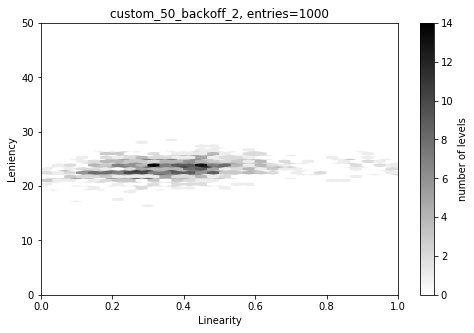

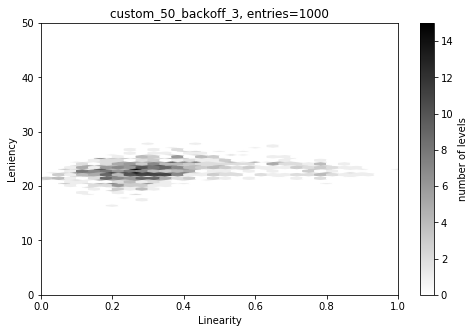

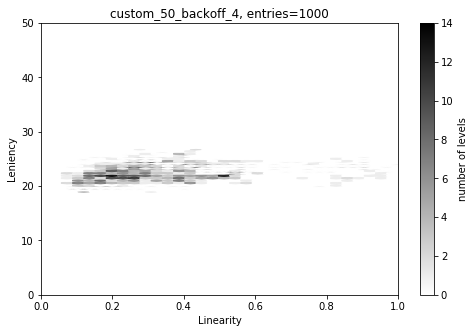

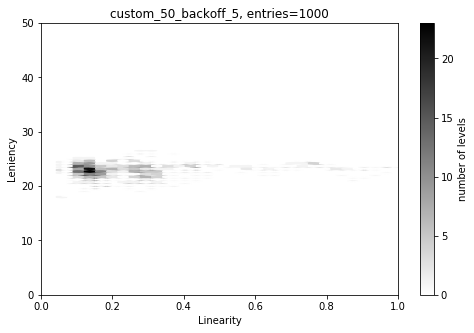

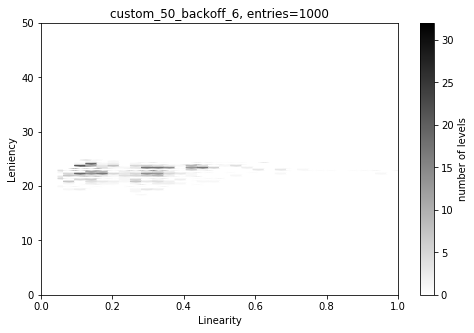

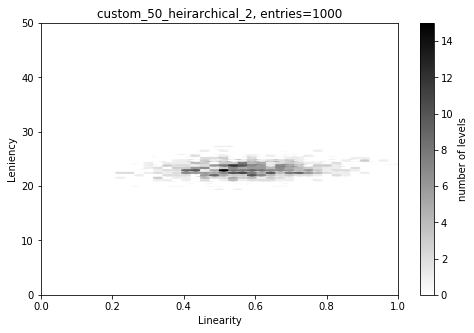

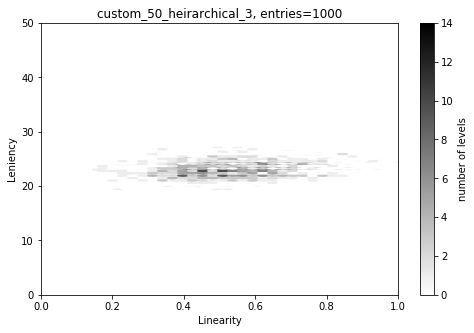

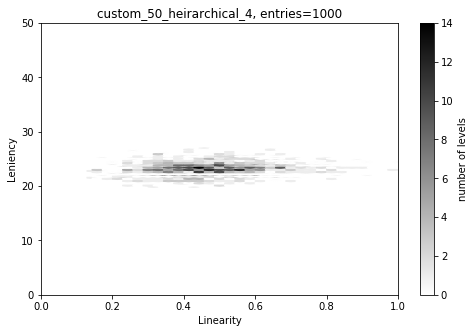

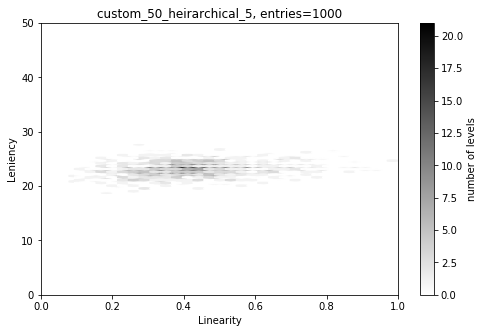

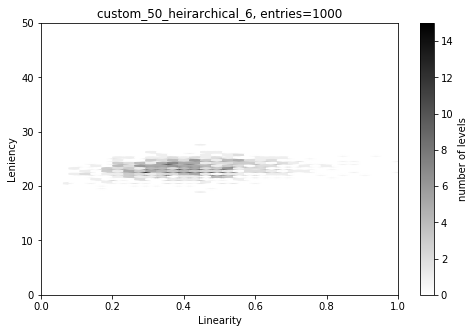

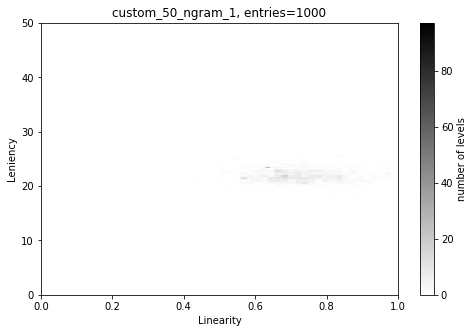

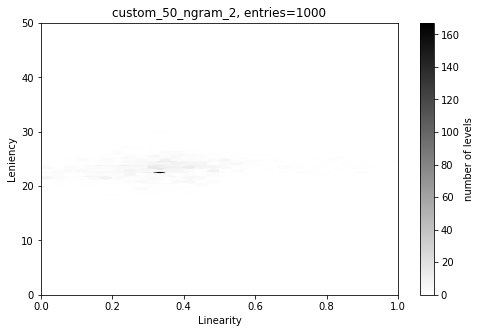

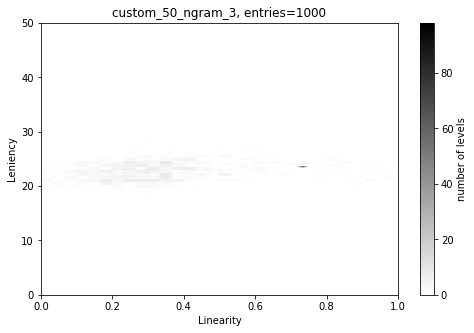

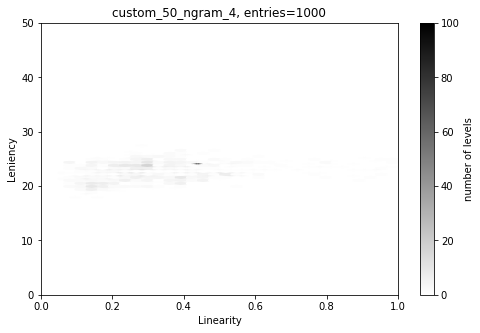

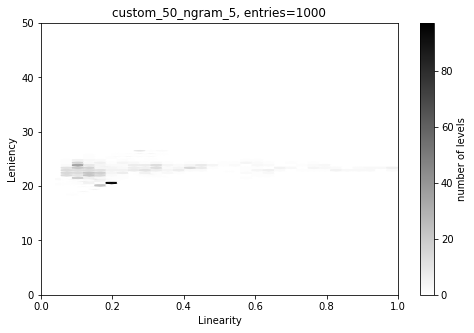

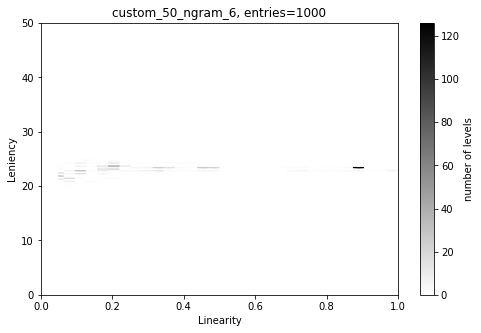

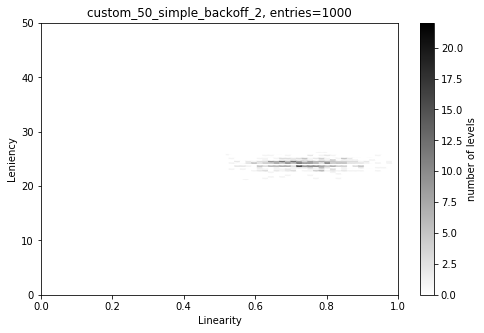

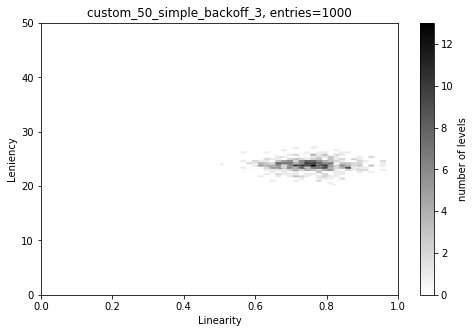

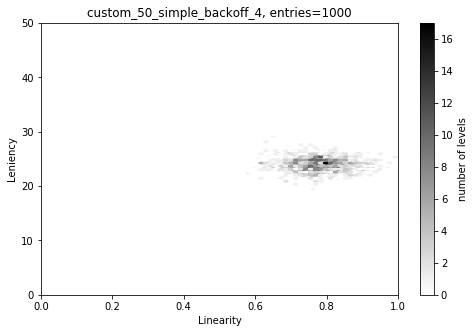

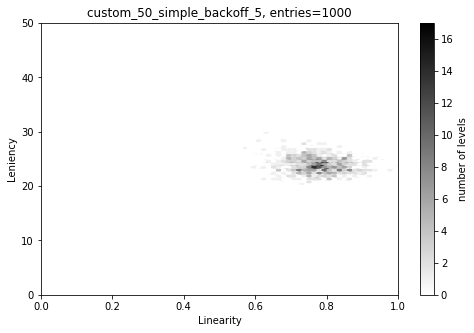

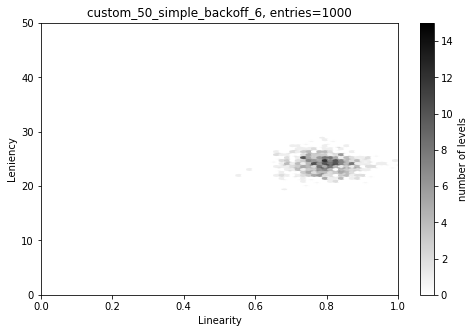

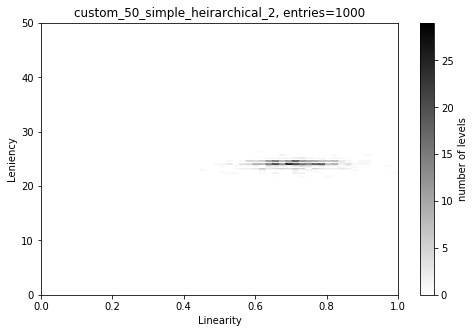

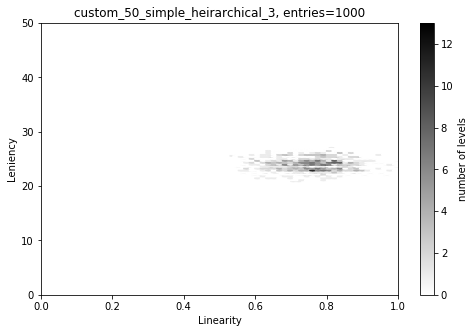

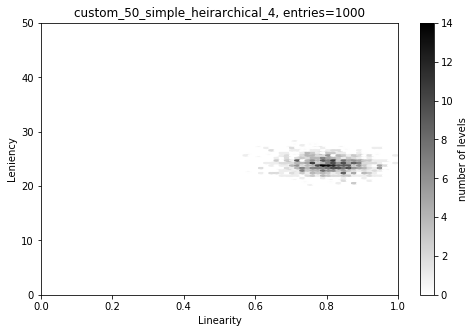

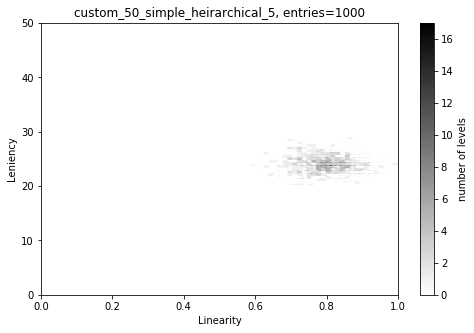

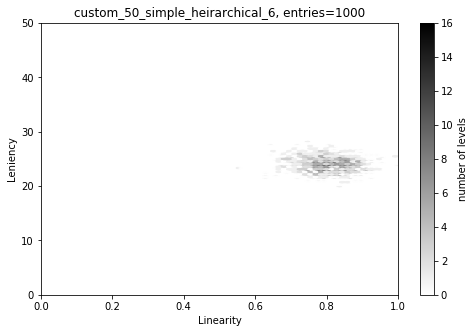

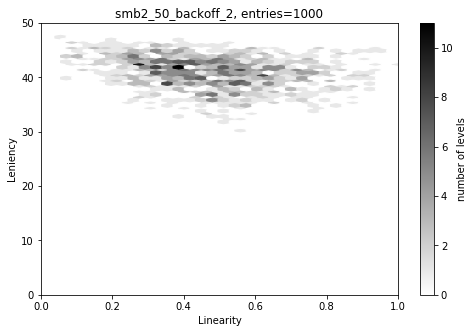

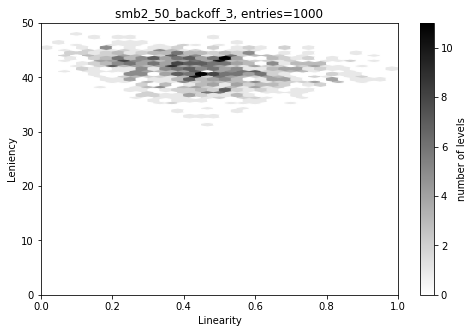

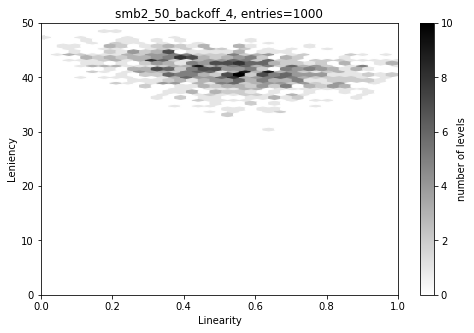

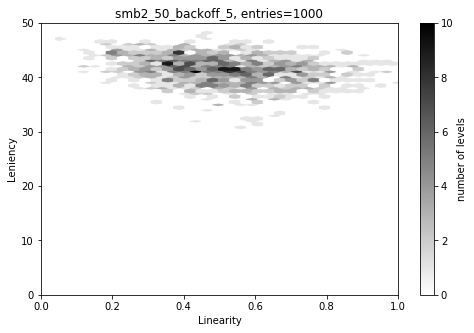

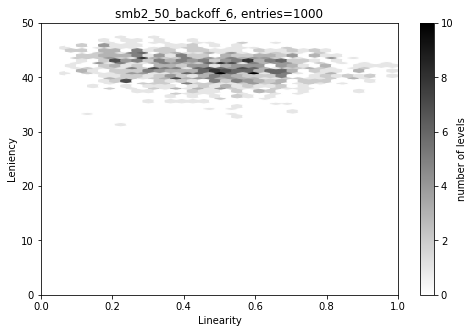

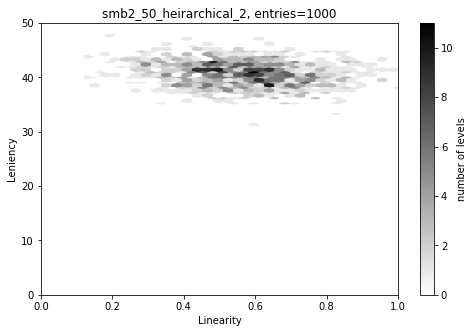

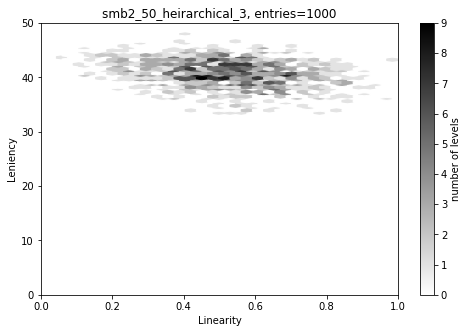

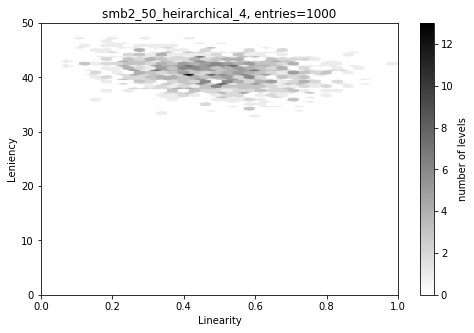

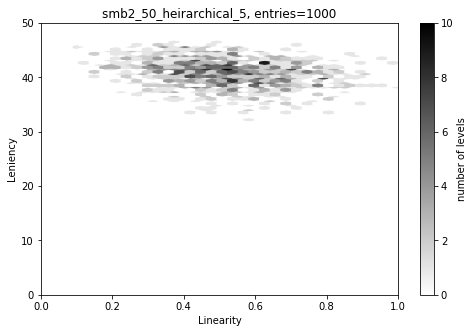

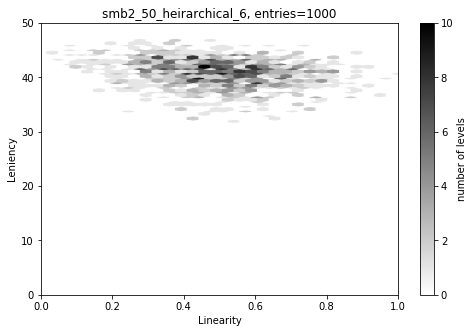

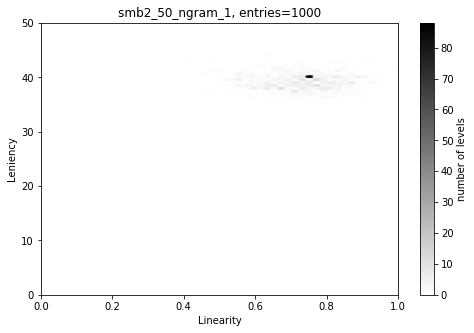

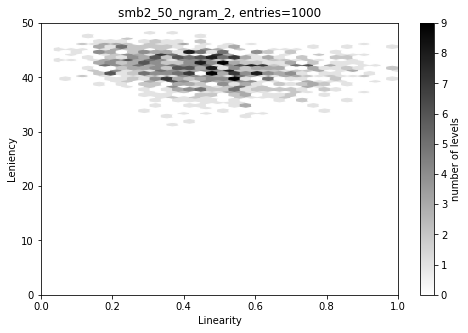

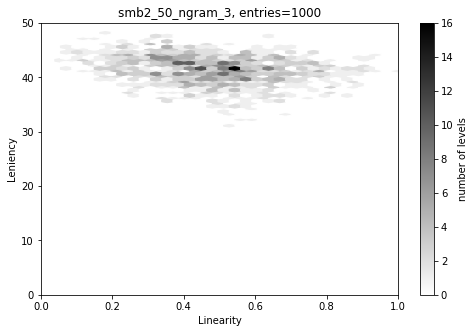

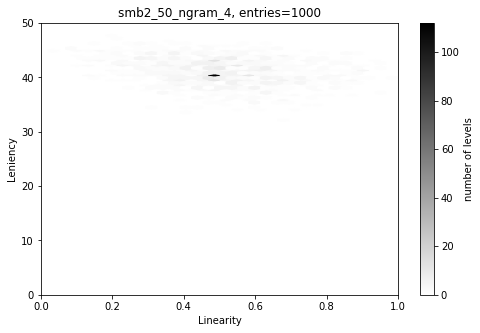

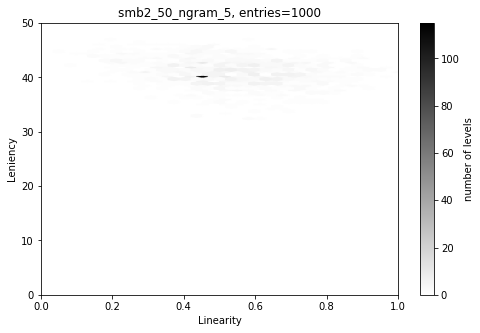

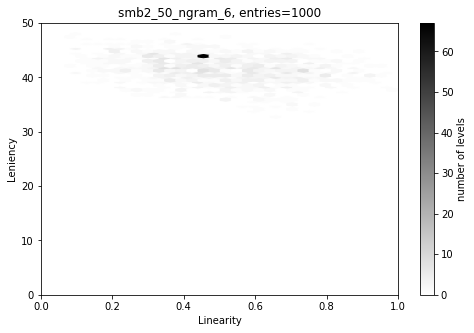

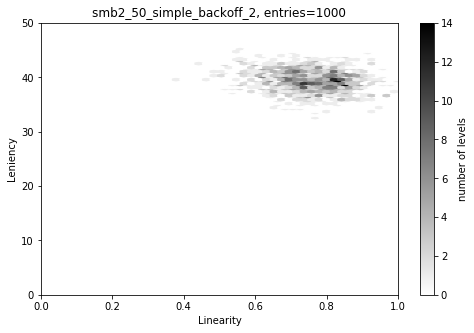

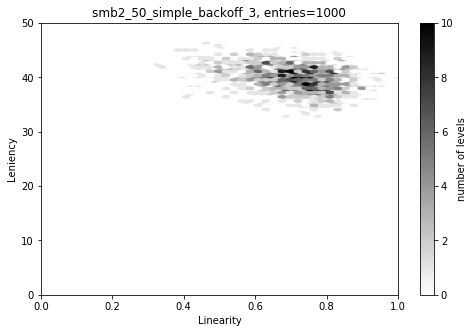

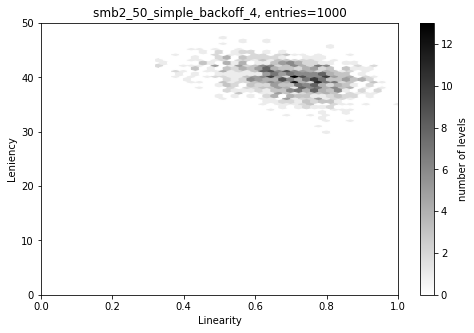

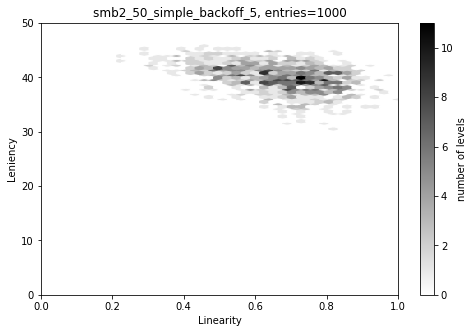

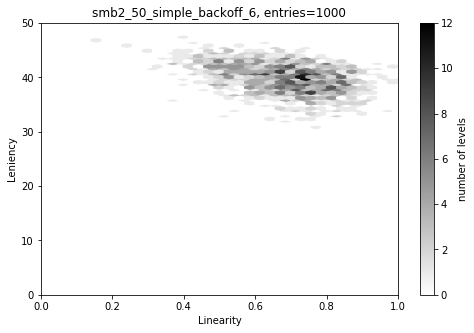

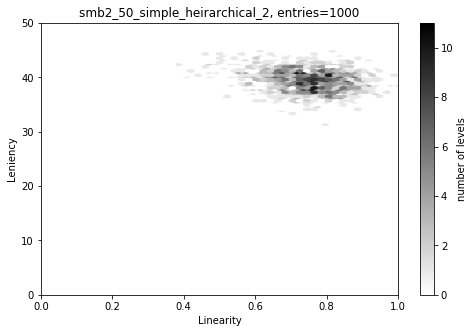

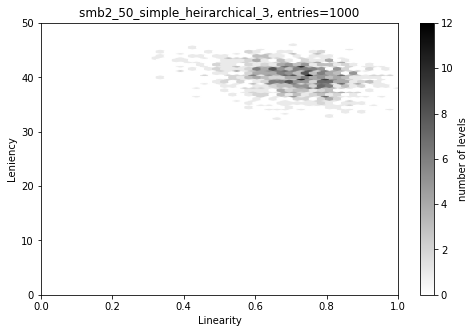

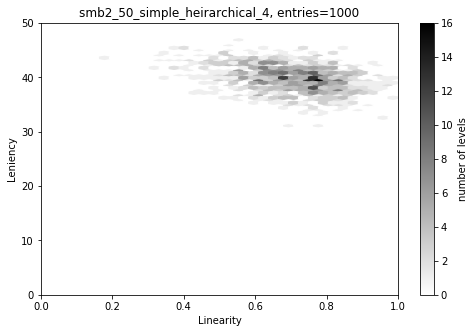

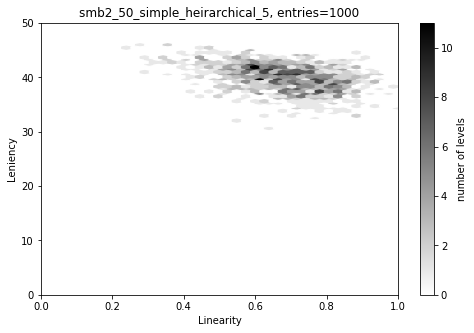

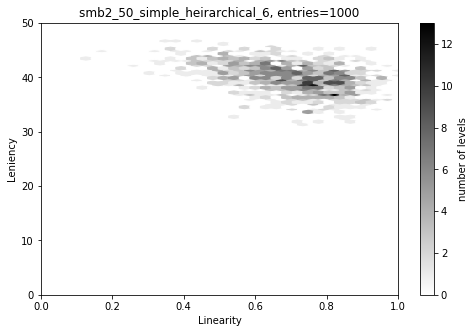

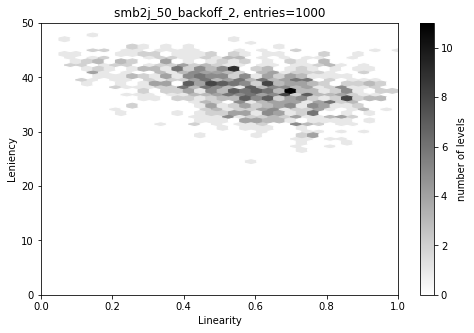

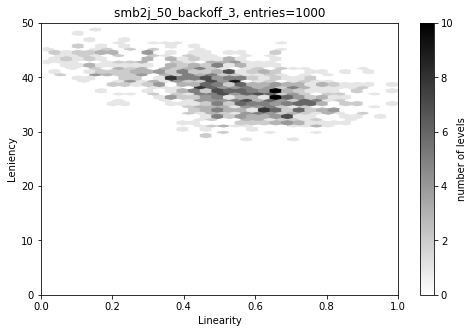

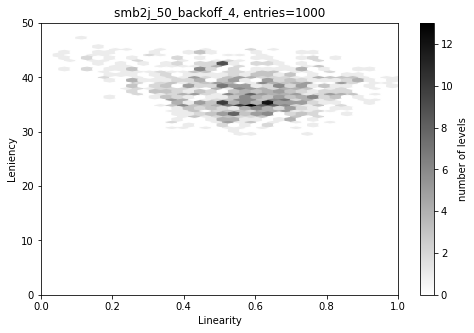

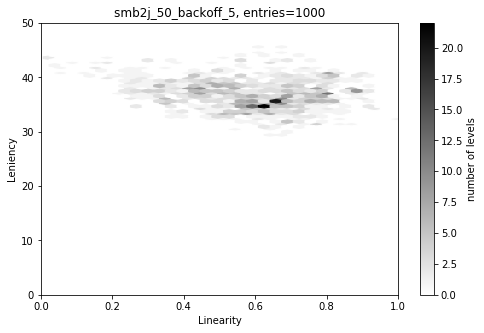

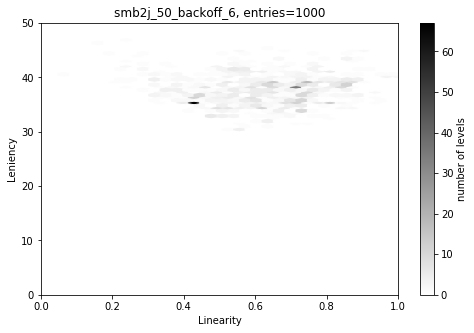

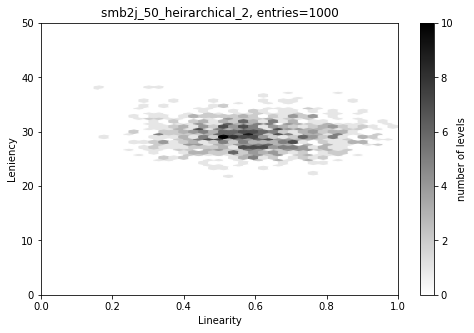

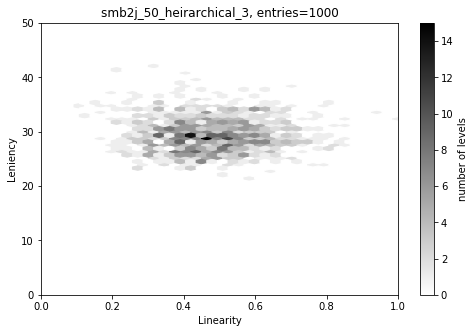

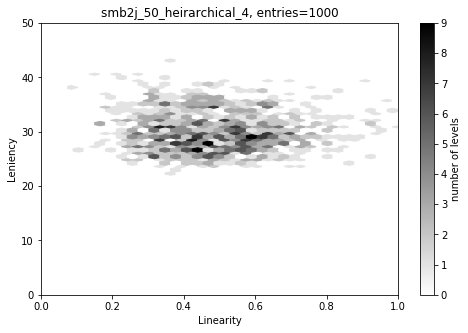

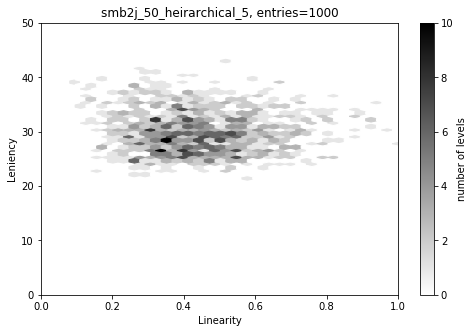

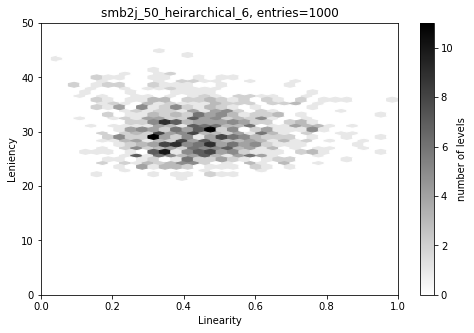

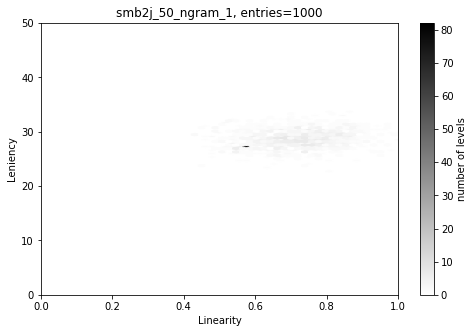

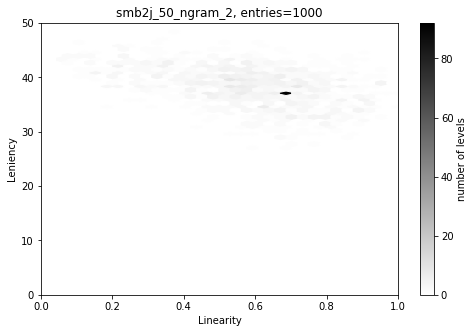

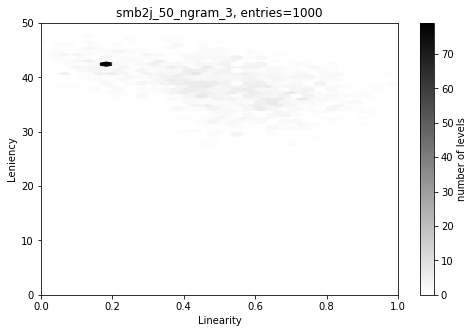

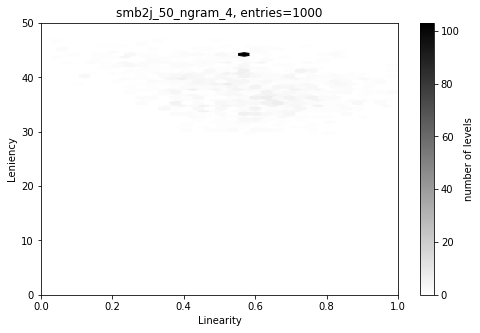

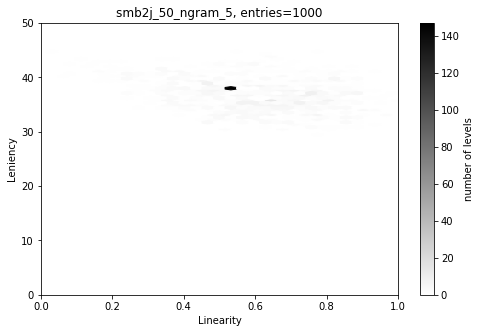

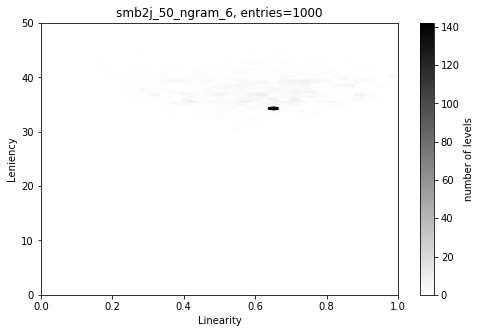

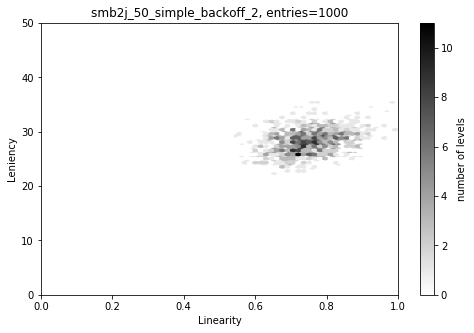

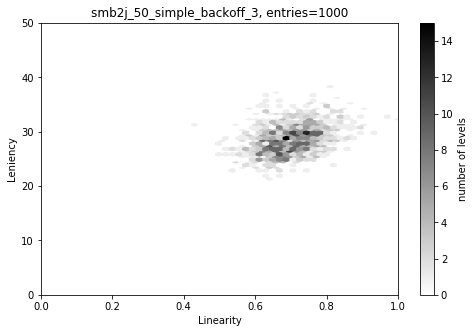

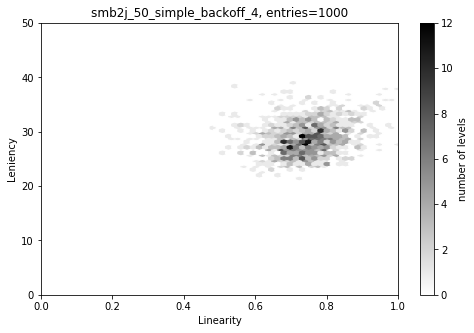

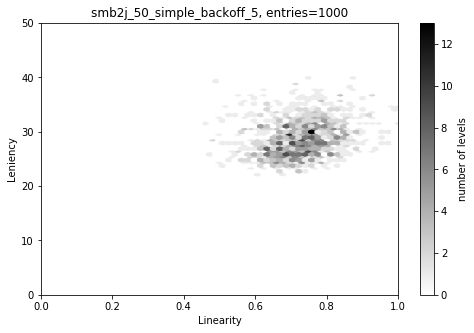

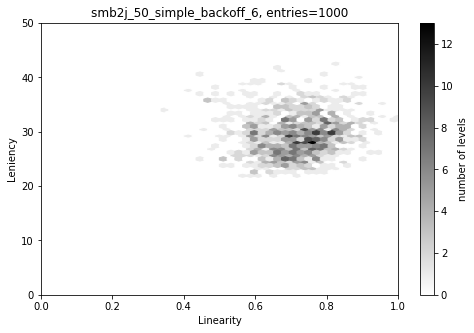

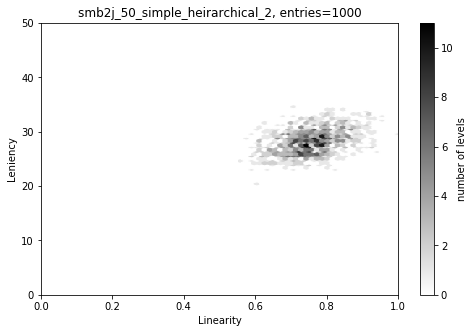

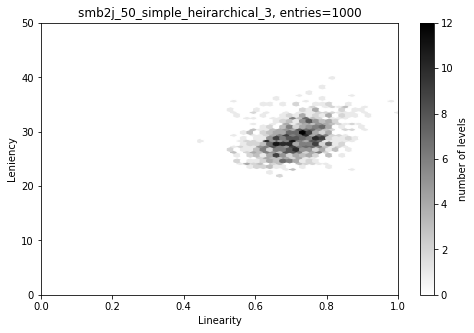

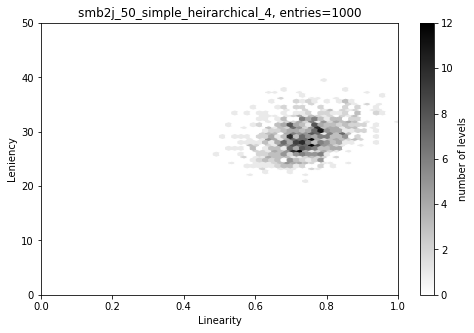

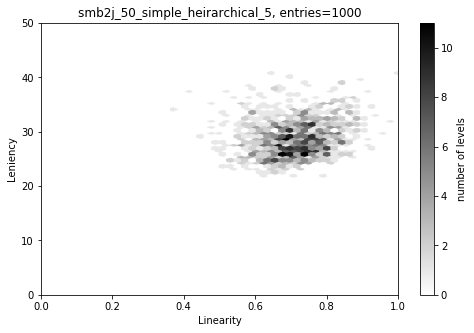

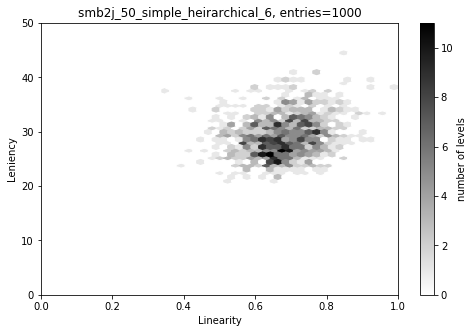

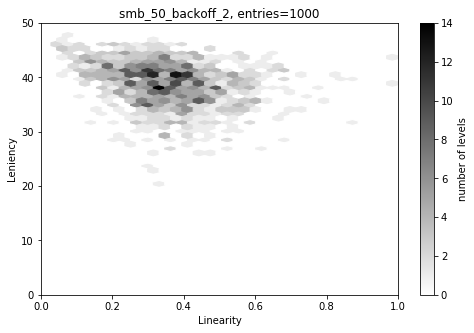

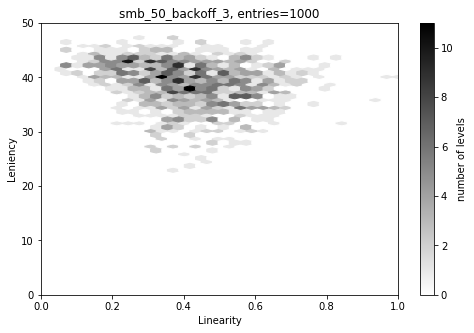

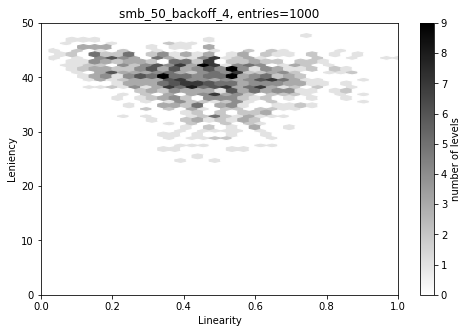

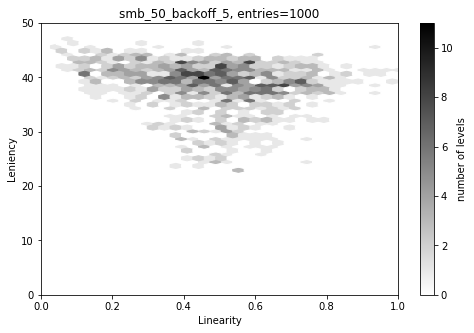

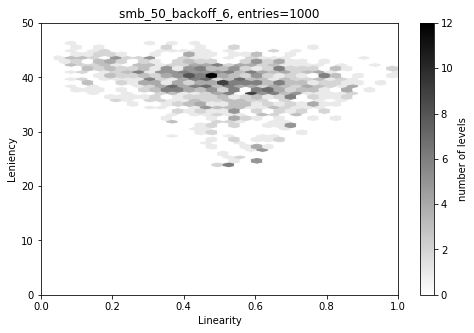

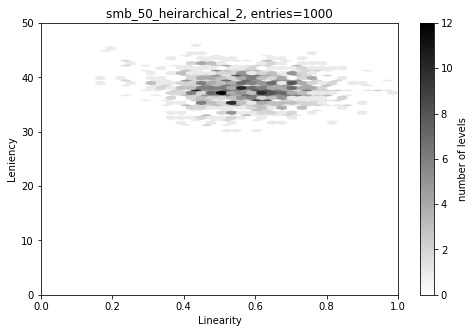

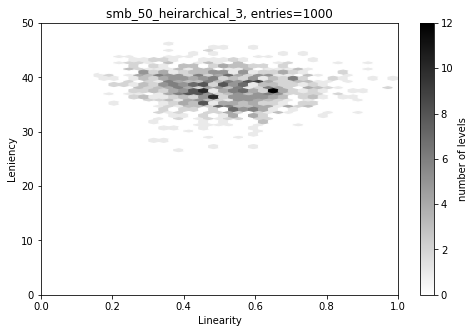

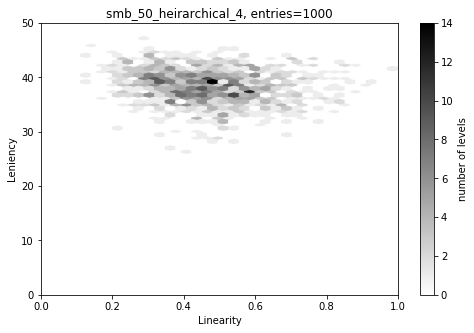

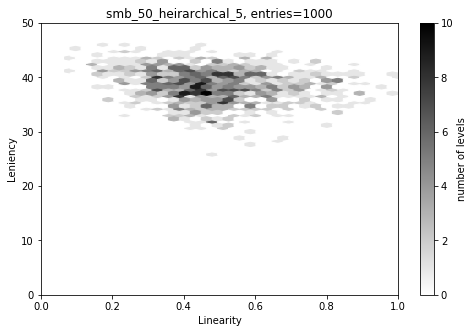

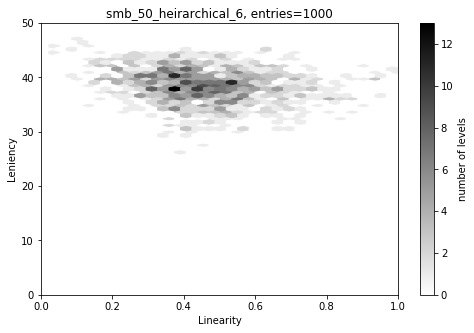

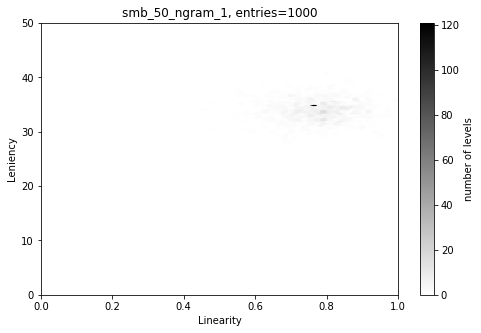

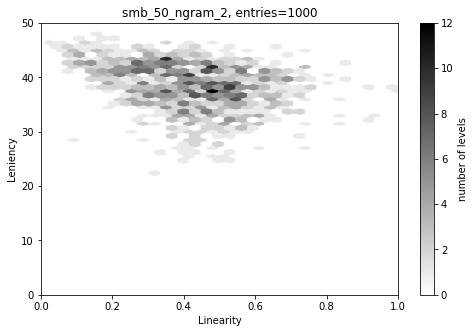

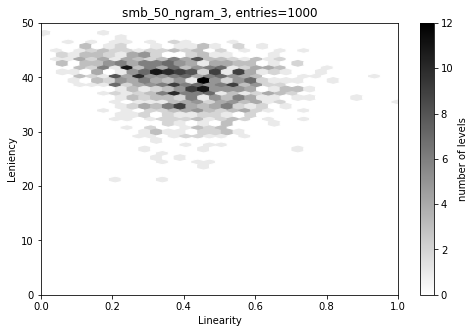

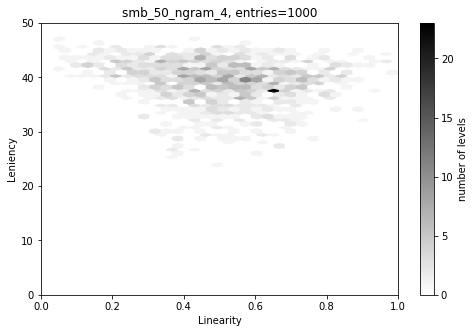

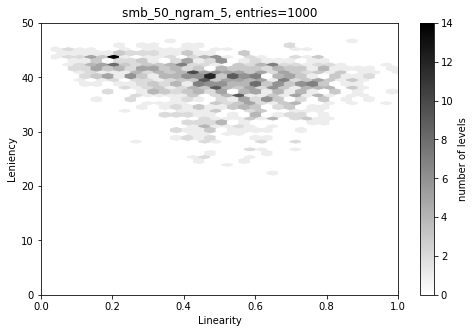

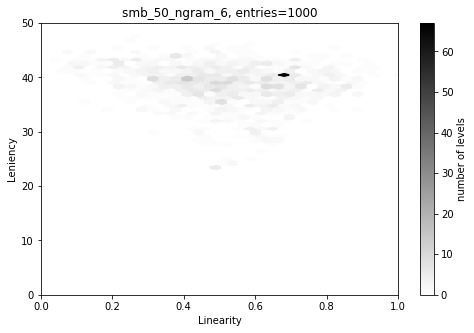

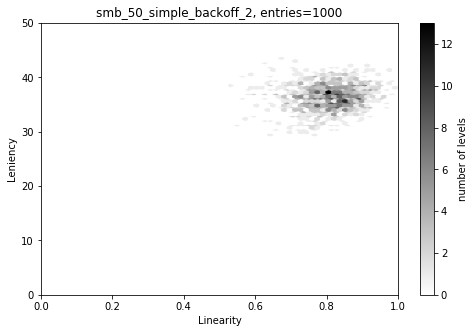

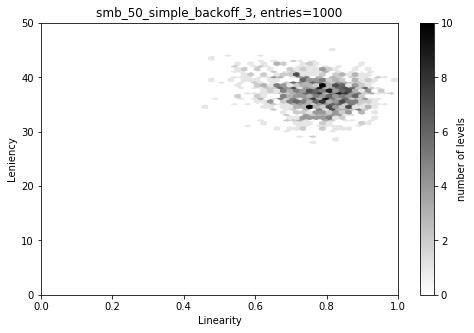

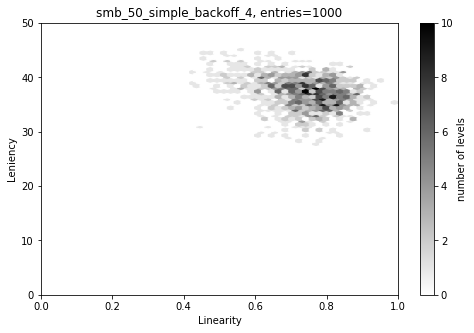

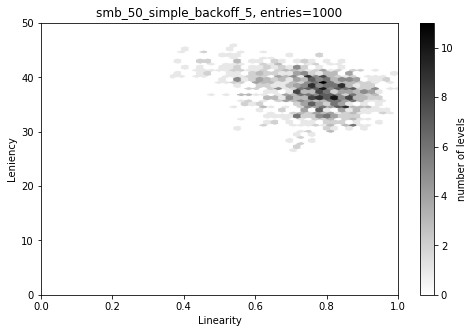

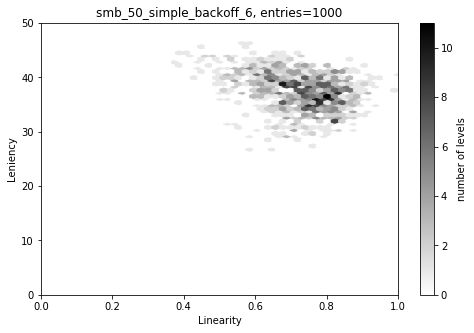

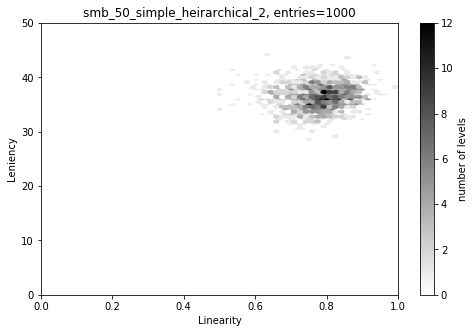

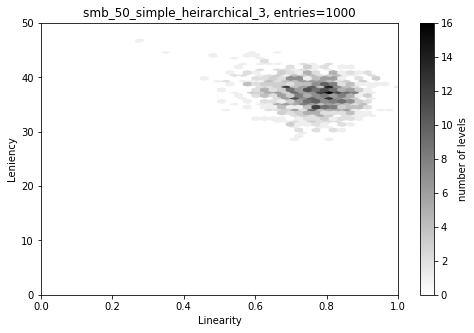

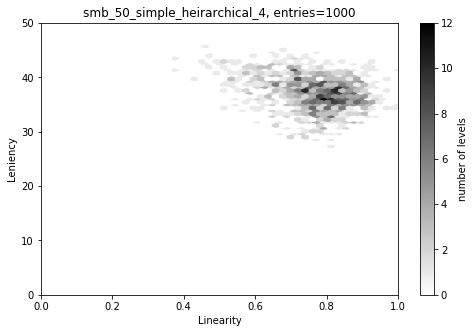

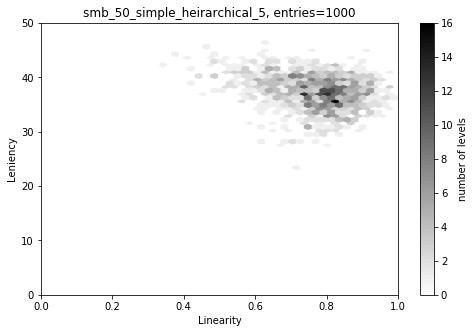

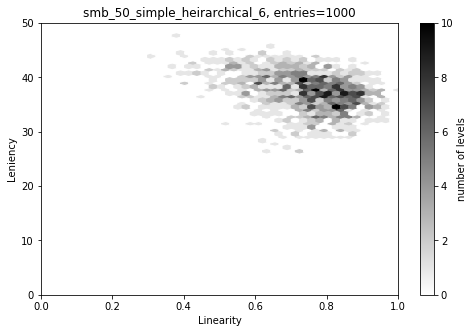

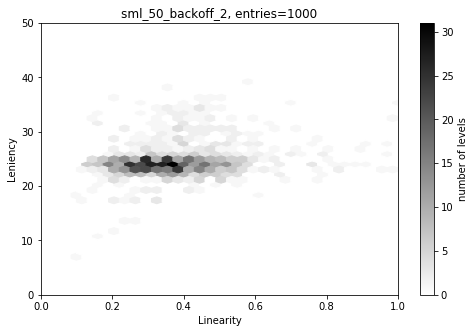

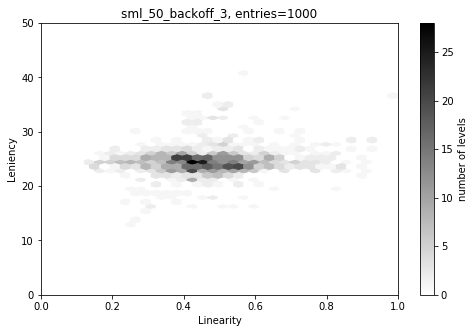

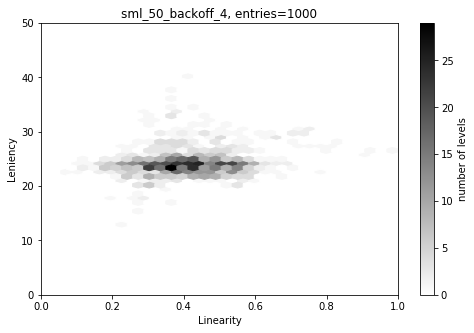

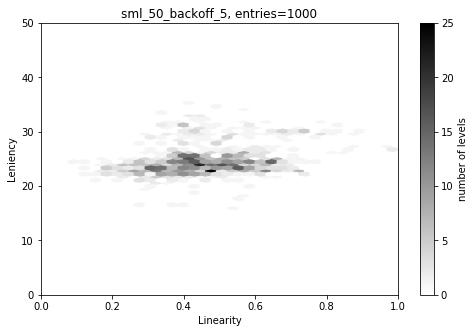

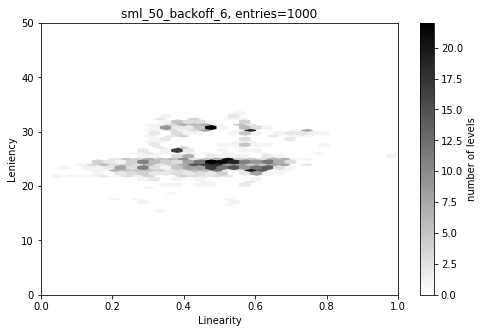

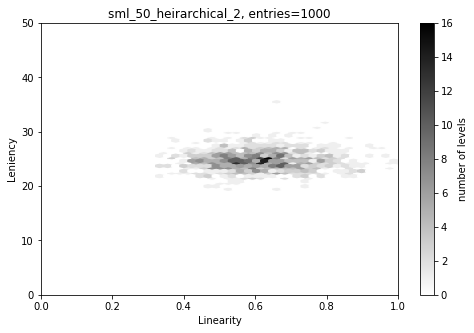

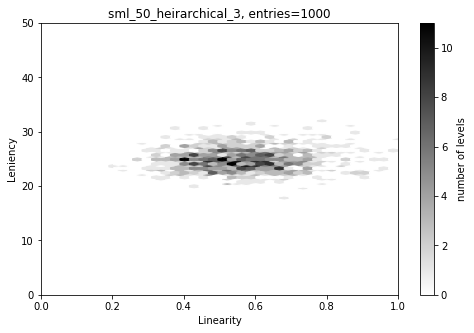

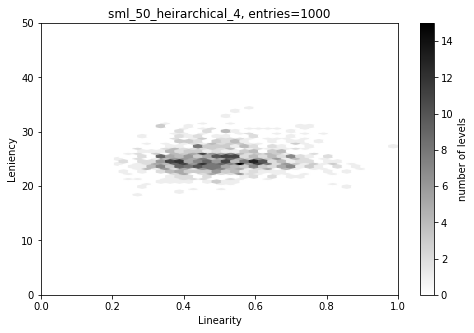

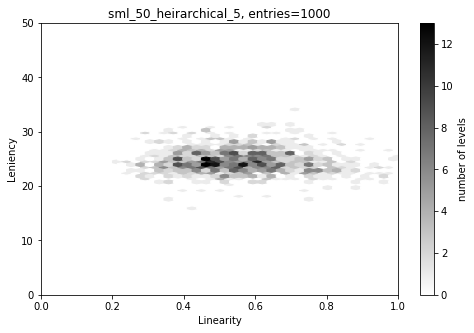

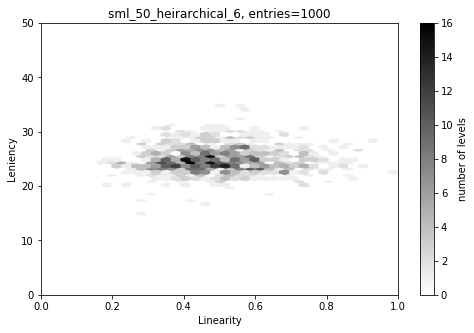

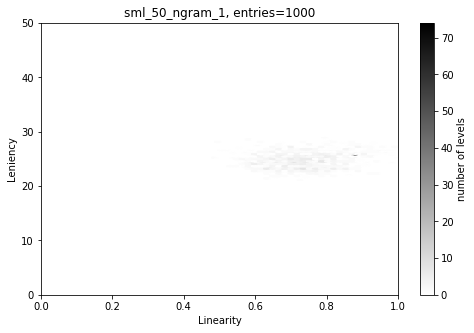

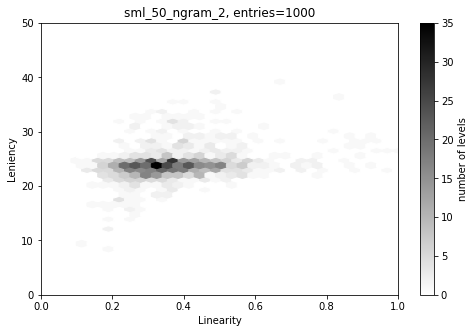

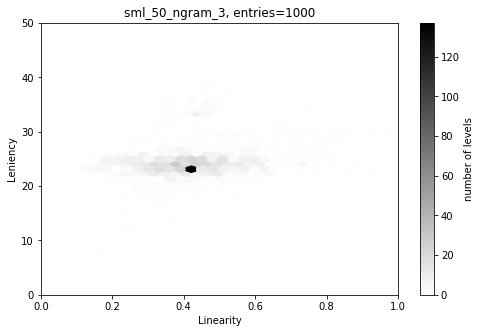

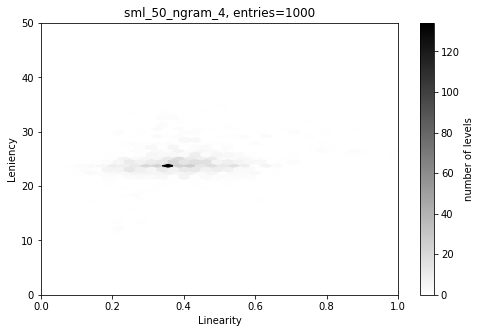

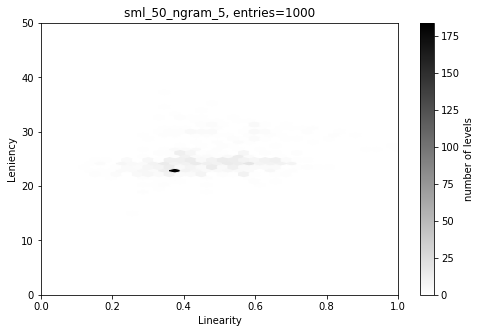

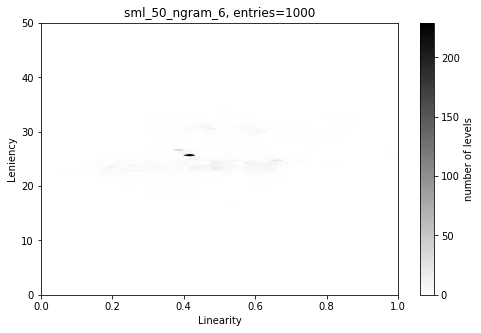

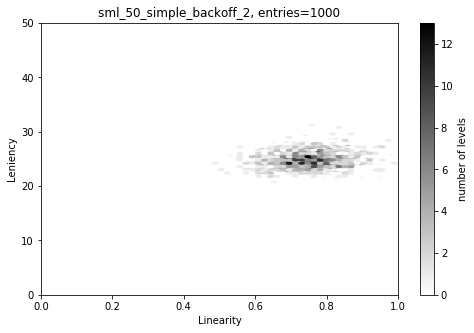

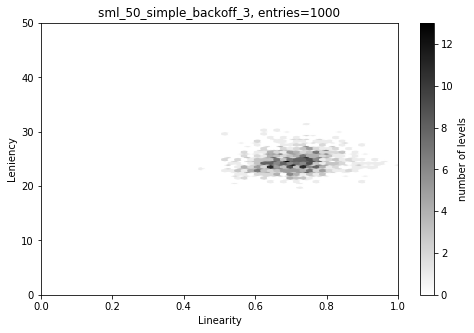

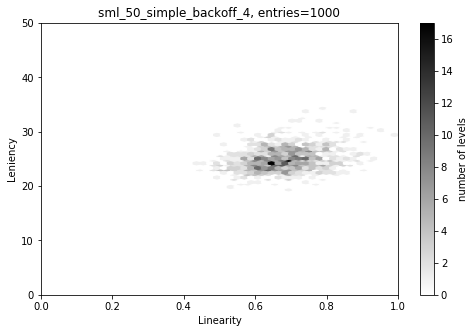

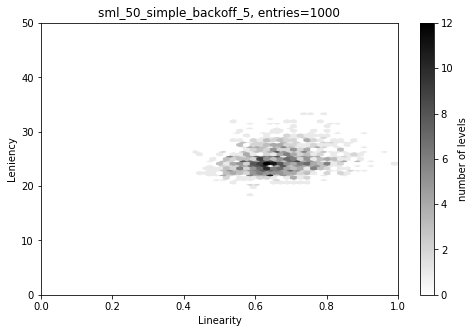

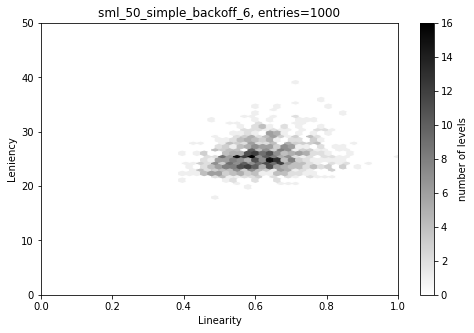

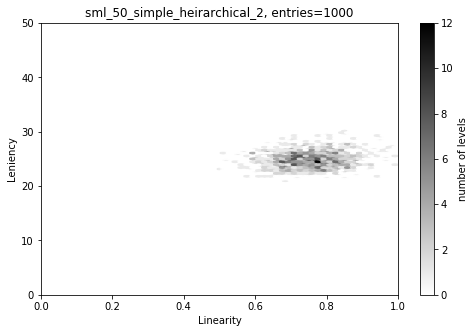

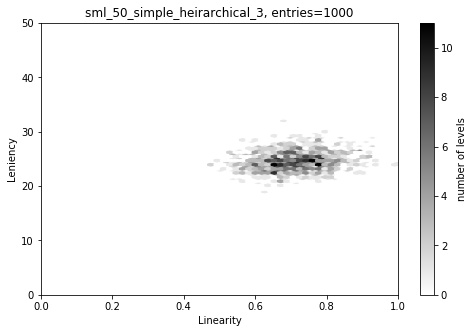

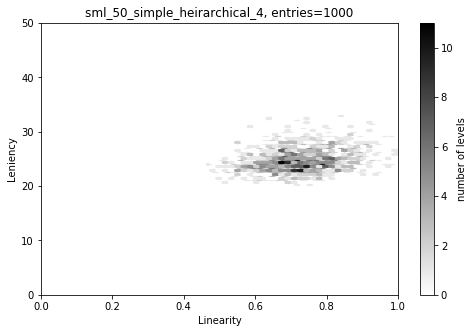

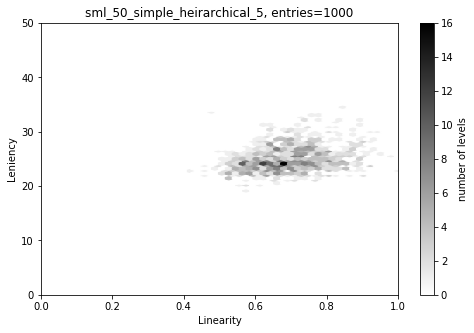

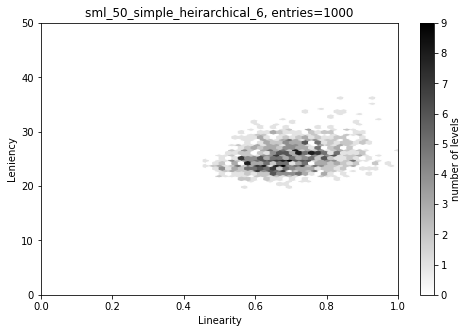

In [5]:
for key in sorted(data.keys()):
    if len(data[key][2]) == 0:
       continue
    
    fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(8, 5))
        
    hb = ax.hexbin(
        data[key][2] / np.max(data[key][2]),
        data[key][3], 
        gridsize=30, 
        cmap='binary')
    
    ax.set(xlim=(0, 1), ylim=(0, 50))
    ax.set_facecolor('white')
    ax.set_title(f'{key}, entries={len(data[key][2])}')
    ax.set_xlabel("Linearity")
    ax.set_ylabel("Leniency")
    
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('number of levels')

    plt.show()

## Averages

In [6]:
def get_averages(key_name):
    averages = {}
    averages['ngram'] = {}
    averages['backoff'] = {}
    averages['heirarchical'] = {}
    averages['simple_backoff'] = {}
    averages['simple_heirarchical'] = {}
    
    for key in sorted(data.keys()):
        if key_name != key.split('_')[0]:
            continue
            
        n_level = key[-1]
        split = key.split('_')
        name = '_'.join(split[2:len(split) - 1])
        
        averages[name][n_level] = []
        
        print(f'{name}_{n_level}')
        print(f'Sequence Probability: {np.array(data[key][0]).mean()}')
        print(f'Perplexity: {np.array(data[key][1]).mean()}')
        print(f'Linearity: {np.array(data[key][2]).mean()}')
        print(f'Leniency: {np.array(data[key][3]).mean() / 50}')
        print()

## Custom

In [7]:
get_averages('custom')

backoff_2
Sequence Probability: 1.3848859523612593e-25
Perplexity: 9.17119887517151e+44
Linearity: 107.58418165666266
Leniency: 0.46492599999999995

backoff_3
Sequence Probability: 9.392897324998177e-22
Perplexity: 2.157820867834367e+30
Linearity: 110.17958448979593
Leniency: 0.45738799999999996

backoff_4
Sequence Probability: 3.1930146934446988e-21
Perplexity: 9.120105038368155e+25
Linearity: 98.42743942376951
Leniency: 0.45284800000000003

backoff_5
Sequence Probability: 4.483959020006417e-22
Perplexity: 8.692915412592328e+23
Linearity: 73.09357358943578
Leniency: 0.4537

backoff_6
Sequence Probability: 2.0157294223492384e-20
Perplexity: 4.077003257617352e+22
Linearity: 68.14201632653064
Leniency: 0.4535060000000001

heirarchical_2
Sequence Probability: 2.550968882200522e-69
Perplexity: 2.6541894654172734e+110
Linearity: 145.03332715486195
Leniency: 0.466628

heirarchical_3
Sequence Probability: 5.116251669078575e-69
Perplexity: 2.118577797414558e+116
Linearity: 142.88233406962786
L

## Super Mario Bros.

In [8]:
get_averages('smb')

backoff_2
Sequence Probability: 4.0938477580044617e-22
Perplexity: 1.8396473406767947e+48
Linearity: 89.4939643697479
Leniency: 0.774922

backoff_3
Sequence Probability: 3.018409740178361e-22
Perplexity: 2.150582170177646e+38
Linearity: 88.95561142857143
Leniency: 0.7768279999999999

backoff_4
Sequence Probability: 3.4620045596290662e-19
Perplexity: 4.668638719416033e+30
Linearity: 85.86122036014407
Leniency: 0.7863079999999999

backoff_5
Sequence Probability: 9.727329570170138e-20
Perplexity: 4.615503906717712e+25
Linearity: 84.00418708283313
Leniency: 0.7690260000000001

backoff_6
Sequence Probability: 2.8941494506725357e-18
Perplexity: 3.998800189615909e+22
Linearity: 86.46716264105642
Leniency: 0.7702239999999999

heirarchical_2
Sequence Probability: 1.385553667730744e-31
Perplexity: 1.7670444725636075e+103
Linearity: 136.50914112845138
Leniency: 0.7581520000000002

heirarchical_3
Sequence Probability: 1.2238827602628213e-32
Perplexity: 4.973677585648019e+101
Linearity: 126.9264938

## Super Mario Bros. 2

In [9]:
get_averages('smb2')

backoff_2
Sequence Probability: 2.523226427399184e-25
Perplexity: 4.528967498060317e+45
Linearity: 89.10510204081633
Leniency: 0.8193320000000002

backoff_3
Sequence Probability: 7.981741136420275e-24
Perplexity: 3.950510223535472e+38
Linearity: 83.54711855942378
Leniency: 0.827804

backoff_4
Sequence Probability: 4.1617234809975336e-22
Perplexity: 2.6545617478613866e+32
Linearity: 86.18828446578631
Leniency: 0.826948

backoff_5
Sequence Probability: 3.3134364305114787e-21
Perplexity: 1.012643188595945e+27
Linearity: 89.35507010804321
Leniency: 0.826702

backoff_6
Sequence Probability: 3.381974750796556e-19
Perplexity: 5.952490717169593e+23
Linearity: 83.25533867947179
Leniency: 0.83337

heirarchical_2
Sequence Probability: 1.4029270048547845e-32
Perplexity: 1.3210179055755448e+86
Linearity: 93.56496763505403
Leniency: 0.8132479999999999

heirarchical_3
Sequence Probability: 3.4483727028501554e-26
Perplexity: 4.054459638677599e+87
Linearity: 88.63001128451381
Leniency: 0.81417600000000

## Super Mario Bros. 2 Japan

In [10]:
get_averages('smb2j')

backoff_2
Sequence Probability: 6.104999552243196e-30
Perplexity: 4.524938795900374e+41
Linearity: 98.44002823529411
Leniency: 0.75898

backoff_3
Sequence Probability: 4.2799741504828536e-26
Perplexity: 9.734176127651055e+33
Linearity: 90.52414477791116
Leniency: 0.757916

backoff_4
Sequence Probability: 8.881896799155896e-24
Perplexity: 3.377178187686552e+27
Linearity: 106.15043942376951
Leniency: 0.7478379999999999

backoff_5
Sequence Probability: 8.013494584779404e-22
Perplexity: 1.1137181843528108e+24
Linearity: 98.485144969988
Leniency: 0.737714

backoff_6
Sequence Probability: 3.059617001513729e-20
Perplexity: 8.27404963061217e+21
Linearity: 103.45894386554622
Leniency: 0.7506619999999998

heirarchical_2
Sequence Probability: 1.3681145486307632e-68
Perplexity: 1.731936834888436e+116
Linearity: 122.0560843217287
Leniency: 0.585622

heirarchical_3
Sequence Probability: 5.632160512984058e-62
Perplexity: 9.246995839462664e+122
Linearity: 119.60342885954381
Leniency: 0.588788000000000

## Super Mario Land

In [11]:
get_averages('sml')

backoff_2
Sequence Probability: 1.331654042440131e-23
Perplexity: 2.4254674092314425e+49
Linearity: 103.38119346938775
Leniency: 0.492042

backoff_3
Sequence Probability: 9.5357120593104e-23
Perplexity: 1.601254104667435e+38
Linearity: 106.69857325330132
Leniency: 0.49048799999999987

backoff_4
Sequence Probability: 5.360633531263535e-24
Perplexity: 5.919585078777467e+30
Linearity: 99.08485608643457
Leniency: 0.48564

backoff_5
Sequence Probability: 2.844166807097158e-22
Perplexity: 1.2126358403082164e+26
Linearity: 104.30245176470588
Leniency: 0.491932

backoff_6
Sequence Probability: 1.387994189251746e-20
Perplexity: 7.975100321508968e+23
Linearity: 104.65342026410563
Leniency: 0.5063360000000001

heirarchical_2
Sequence Probability: 1.4187912817247455e-86
Perplexity: 5.909071640274784e+130
Linearity: 153.52787202881154
Leniency: 0.49479800000000007

heirarchical_3
Sequence Probability: 2.865293965291062e-73
Perplexity: 2.5137917234586304e+132
Linearity: 149.54994026410563
Leniency: 

## Linearity x Leniency Pareto Frontier

In [12]:
def linearity_leniency_frontier(game_key):
    plot_data = {
        'ngram':[[0 for i in range(6)], [0 for i in range(6)]],
        'backoff': [[0 for i in range(6)], [0 for i in range(6)]],
        'simple_backoff': [[0 for i in range(6)], [0 for i in range(6)]],
        'heirarchical': [[0 for i in range(6)], [0 for i in range(6)]],
        'simple_heirarchical': [[0 for i in range(6)], [0 for i in range(6)]]}
    
    for key in data.keys():
        split = key.split('_')
        if game_key != split[0]:
            continue
            
        size = int(split[-1]) - 1
        
        if len(split) == 4:
            algorithm = split[2]
        else:
            algorithm = '_'.join(split[2:4])
            
        plot_data[algorithm][0][size] = (data[key][2] / np.max(data[key][2])).mean()
        plot_data[algorithm][1][size] = data[key][3].mean() / 50
        
    plot_data['backoff'][0][0] = plot_data['ngram'][0][0]
    plot_data['backoff'][1][0] = plot_data['ngram'][1][0]
    
    plot_data['simple_backoff'][0][0] = plot_data['ngram'][0][0]
    plot_data['simple_backoff'][1][0] = plot_data['ngram'][1][0]
    
    plot_data['heirarchical'][0][0] = plot_data['ngram'][0][0]
    plot_data['heirarchical'][1][0] = plot_data['ngram'][1][0]
    
    plot_data['simple_heirarchical'][0][0] = plot_data['ngram'][0][0]
    plot_data['simple_heirarchical'][1][0] = plot_data['ngram'][1][0]
        
    def make_subplot(ax, ngram_data, other_data, other_label):
        ax.plot(ngram_data[0], ngram_data[1], '-o', label='ngram')
        ax.plot(other_data[0], other_data[1], '-o', label=other_label)
        ax.plot(ngram_data[0][0], ngram_data[1][0], 'D', markersize=12, label='n=1')
                
        ax.set_title(f'N-Gram x {other_label}')
        ax.set_xlabel("Linearity")
        ax.set_ylabel("Leniency")
#         ax.set(xlim=(0, 1), ylim=(0, 1))
        ax.legend()
        
    figs, axs =  plt.subplots(2, 2, figsize=(16,16))
    make_subplot(axs[0][0], plot_data['ngram'], plot_data['backoff'], 'backoff')
    make_subplot(axs[0][1], plot_data['ngram'], plot_data['heirarchical'], 'heirarchical')
    make_subplot(axs[1][0], plot_data['ngram'], plot_data['simple_backoff'], 'simple_backoff')
    make_subplot(axs[1][1], plot_data['ngram'], plot_data['simple_heirarchical'], 'simple_heirarchical')
    plt.show()

### Custom

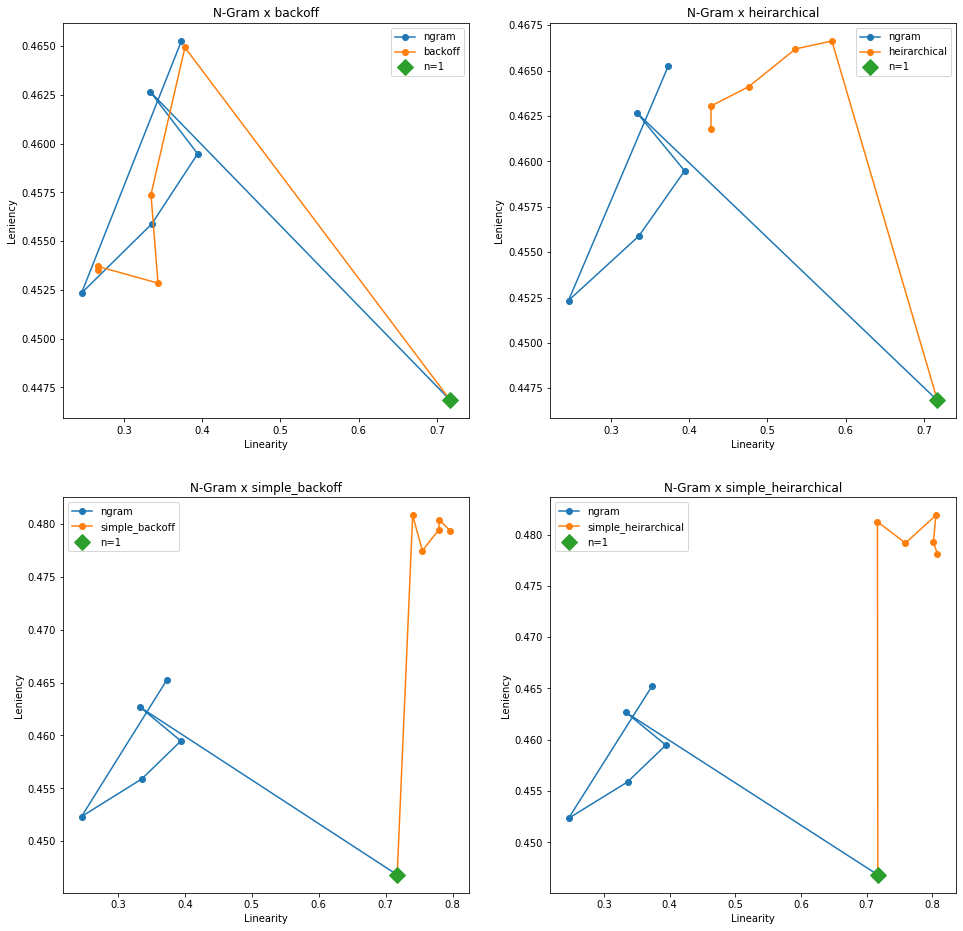

In [13]:
linearity_leniency_frontier('custom')

### Super Mario Bros.

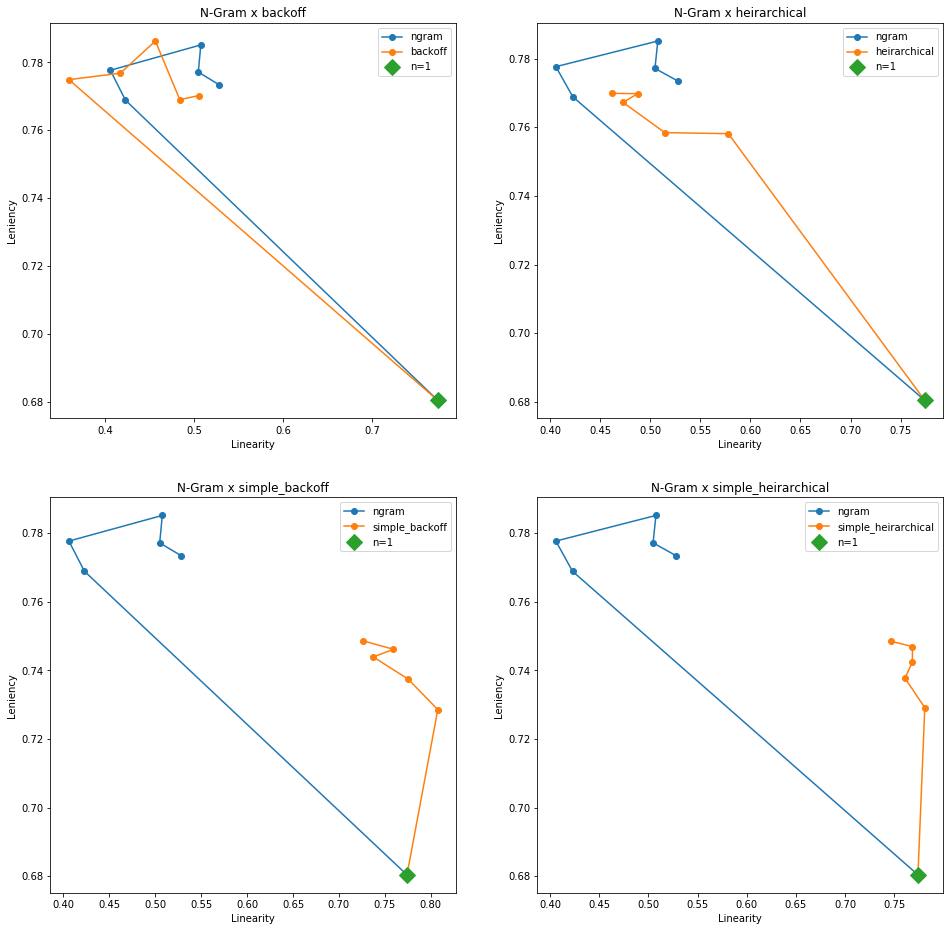

In [14]:
linearity_leniency_frontier('smb')

### Super Mario Bros. 2

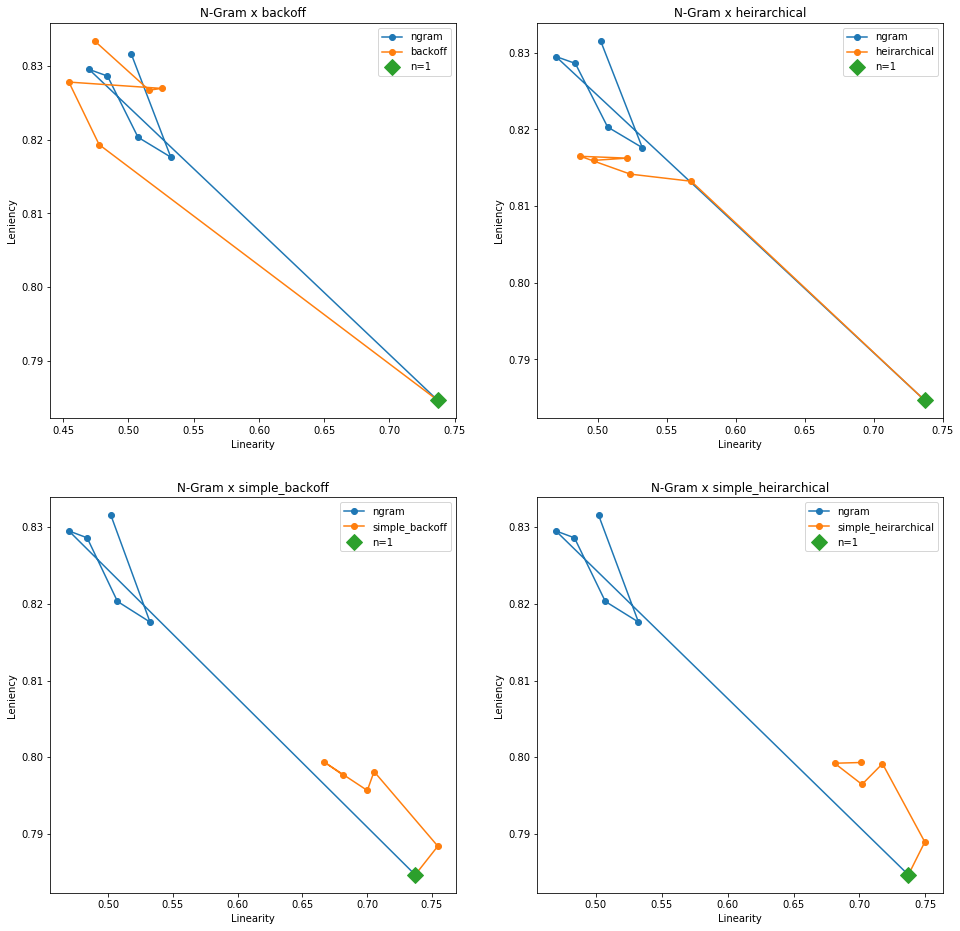

In [15]:
linearity_leniency_frontier('smb2')

### Super Mario Bros. 2 Japan

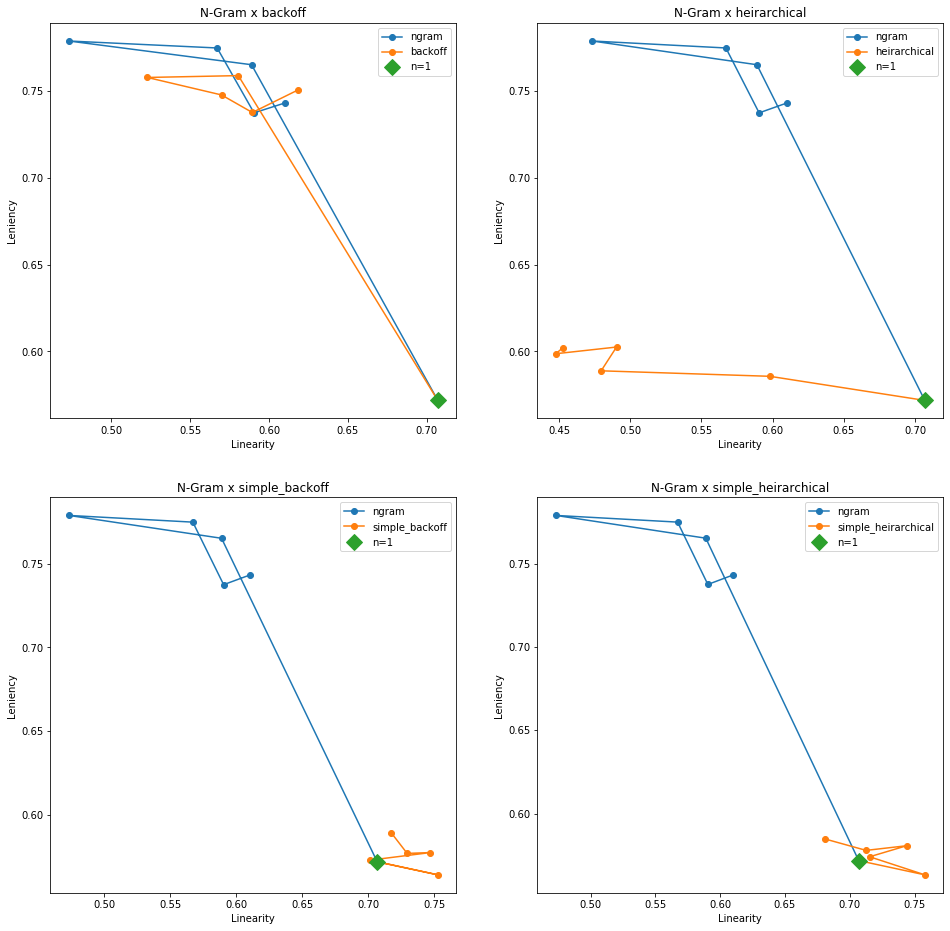

In [16]:
linearity_leniency_frontier('smb2j')

### Super Mario Land

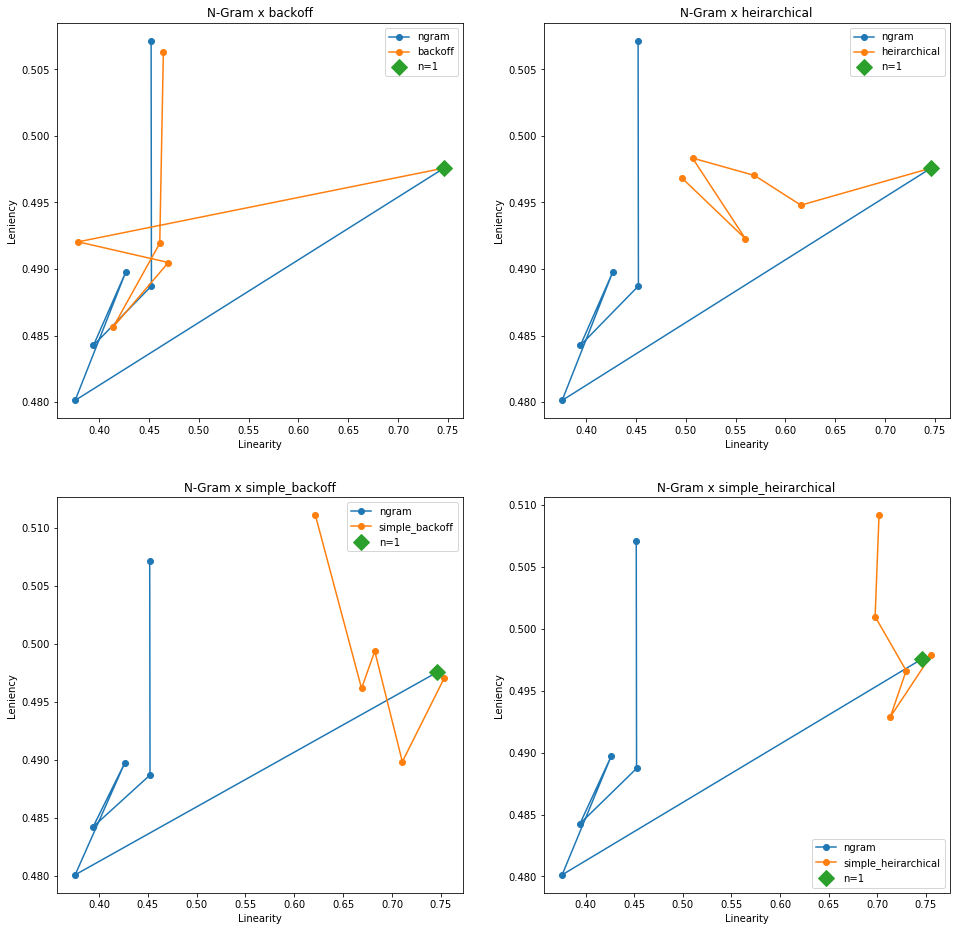

In [17]:
linearity_leniency_frontier('sml')